## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(study_results)

#mouse_metadata.head()

# Combine the data into a single dataset
mousemerge_df = mouse_metadata.merge(study_results, on='Mouse ID')
mousemerge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice in the DataFrame.
#study_results.index
mousemerge_df['Mouse ID'].count()

print(mousemerge_df['Mouse ID'].nunique())

249


In [4]:
mouse_counts = mousemerge_df['Mouse ID'].value_counts()
mouse_counts

g989    13
w575    10
b742    10
m550    10
l661    10
        ..
f932     1
n482     1
o848     1
d133     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#print(mousemerge_df)['Mouse ID'].duplicates[0]
mousemerged_df = mousemerge_df[mousemerge_df.duplicated(['Mouse ID'], keep=False)]
mousemerged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mousemerge_df[mousemerge_df.duplicated() ==True].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [53]:
#mousemerge_df.loc[mousemerge_df.Mouse_ID == 'g989']

In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_drop_df = mousemerge_df.drop(Mouse_ID = 'g989')
#mouse_drop_df

In [58]:
# Checking the number of mice in the clean DataFrame.
print(mousemerged_df['Mouse ID'].nunique())
print(mouse_drop_df['Mouse ID'].nunique())

237
12


## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
  #tumor_volume = mousemerge_df(['Drug Regimen']).mean()
mouse_mean_df = mousemerged_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_median_df = mousemerged_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_var_df = mousemerged_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_std_df = mousemerged_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_sem_df = mousemerged_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
mouse_summary_df = pd.DataFrame({'Mean': mouse_mean_df, 
                                'Median': mouse_median_df,
                                'Variance': mouse_var_df,
                                'Standard Deviation': mouse_std_df,
                                'SEM': mouse_sem_df})
mouse_summary_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.765682,51.910178,38.835601,6.231822,0.472433
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.345698,53.739593,68.149888,8.255295,0.605308
Naftisol,54.432995,52.544915,65.934669,8.120017,0.598616
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.284444,52.488221,59.303779,7.700895,0.573991


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
summary_df = mousemerged_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_df
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.765682  51.910178  38.835601  6.231822  0.472433
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.345698  53.739593  68.149888  8.255295  0.605308
Naftisol              54.432995  52.544915  65.934669  8.120017  0.598616
Placebo               54.083767  52.316010  61.051374  7.813538  0.582387
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.284444  52.488221  59.303779  7.700895  0.573991
Zoniferol             53.282012  51.826638  48.424014  6.958737  0.517239

## Bar Plots

<IPython.core.display.Javascript object>


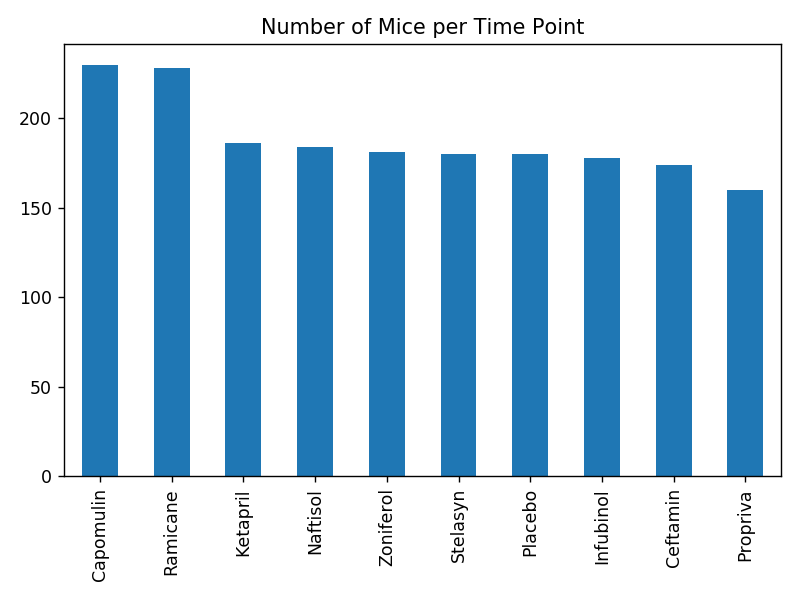

In [62]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas.
drug_df = mousemerged_df['Drug Regimen'].value_counts()
drug_df.plot(kind='bar')
#state_and_inches.plot(kind="bar", figsize=(20,3))
plt.title('Number of Mice per Time Point')

plt.show()
plt.tight_layout()




<IPython.core.display.Javascript object>


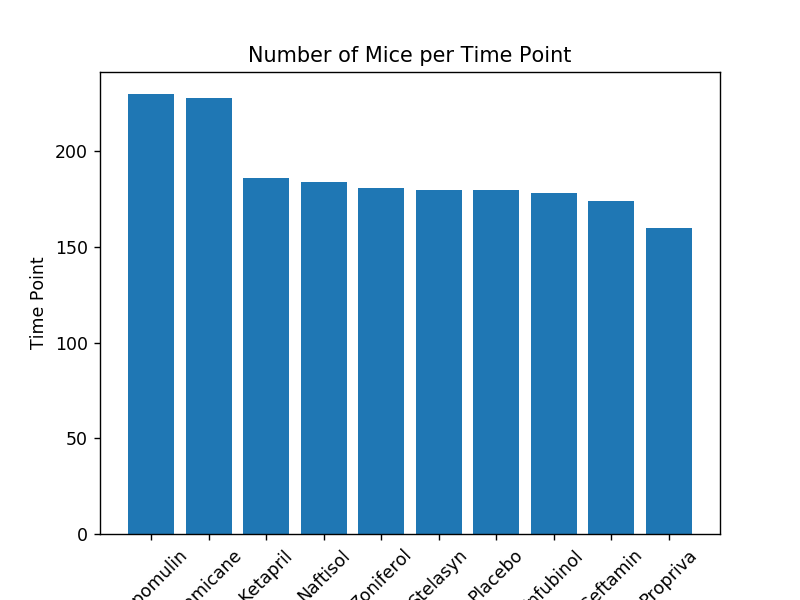

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

In [63]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pyplot.
x_axis = drug_df.index.values
y_axis = drug_df.values

plt.title('Number of Mice per Time Point')
plt.xlabel('Drug Regimen')
plt.ylabel('Time Point')

tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis) 
plt.xticks(rotation=45)
#color='r', alpha=0.5, align="center")

## Pie Plots

In [64]:
mousemerged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
P = mousemerged_df.groupby('Mouse ID')['Sex'].count().reset_index()
P['Percentage'] = 100 * P['Sex']  / P['Sex'].sum()
P

,Mouse ID,Sex,Percentage
0,a203,10,0.531632
1,a251,10,0.531632
2,a262,10,0.531632
3,a275,10,0.531632
4,a366,7,0.372142
...,...,...,...
232,z435,3,0.159490
233,z578,10,0.531632
234,z581,10,0.531632
235,z795,10,0.531632


In [74]:
sex_p = pd.crosstab(mousemerged_df['Mouse ID'],mousemerged_df['Sex']).apply(lambda r: r/r.sum(), axis=1)
sex_pd = sex_p.sum()
#sex_p = pd.crosstab(mousemerged_df['Mouse ID'],mousemerged_df['Sex']).apply(lambda r: r/len(mousemerged_df), axis=1)
#sex_p_t = sex_p.groupby(['Female', 'Male']).sum()
sex_pd



Sex
Female    117.0
Male      120.0
dtype: float64

<IPython.core.display.Javascript object>


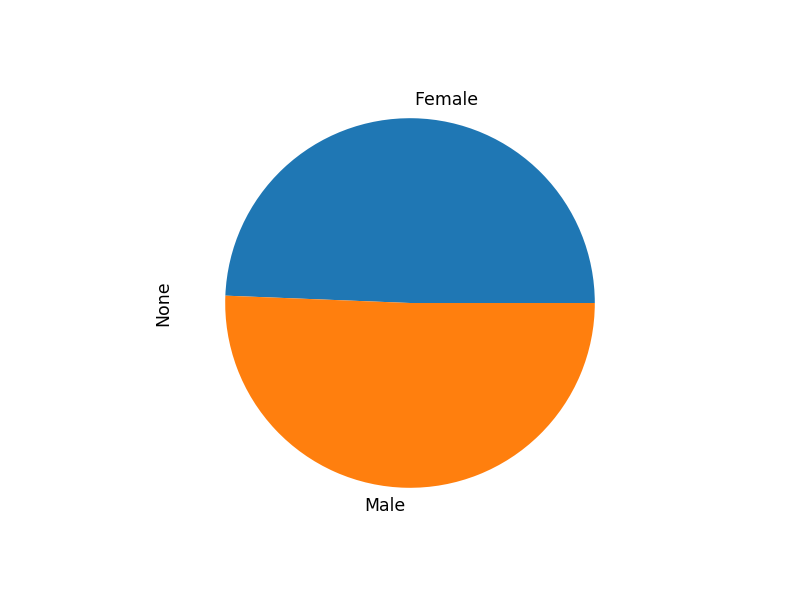

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_pd.plot(kind='pie')
plt.show()

<IPython.core.display.Javascript object>


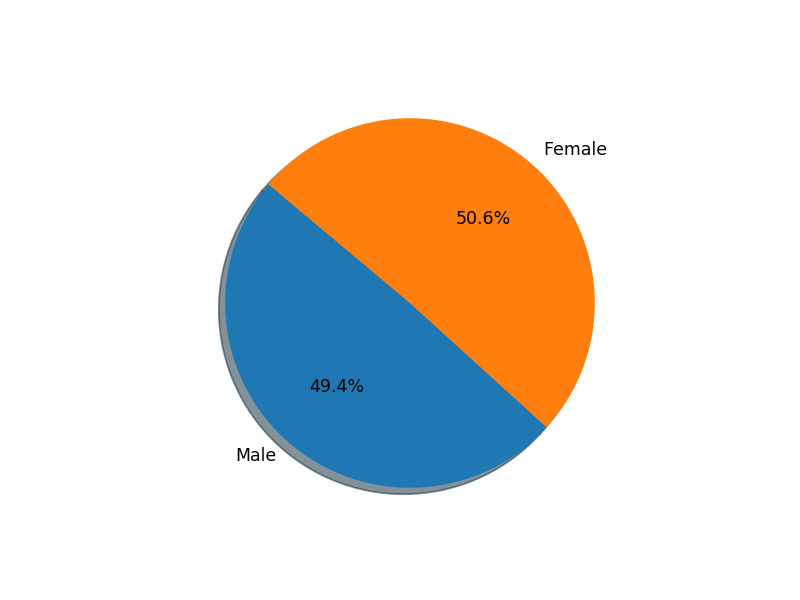

([<matplotlib.patches.Wedge at 0x197b942a080>,
 [Text(-0.7236803217440757, -0.8284242825511522, 'Male'),
  Text(0.7236803217440754, 0.8284242825511524, 'Female')],
 [Text(-0.39473472095131396, -0.4518677904824466, '49.4%'),
  Text(0.39473472095131384, 0.45186779048244674, '50.6%')])

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['Male', 'Female']
plt.pie(sex_pd, labels=gender, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
